In [ ]:
import sys
import os

# Add 'src' folder to the system path
sys.path.append(os.path.abspath("src"))

# Import necessary libraries
import requests
import pandas as pd
from tqdm import tqdm
import time

from dotenv import load_dotenv
load_dotenv()


True

# Downloading the data from github

In [2]:
# GitHub repository details
OWNER = "ballerina-platform"  
REPO = "ballerina-lang"  

# GitHub API token (Required for Events API to avoid rate limiting)
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
if not GITHUB_TOKEN:
    raise ValueError("GITHUB_TOKEN environment variable is not set.")

HEADERS = {
    "Authorization": f"token {GITHUB_TOKEN}",
    "Accept": "application/vnd.github+json"
}

GITHUB_TOKEN to handle the rate limite

In [3]:
def fetch_all_issues(owner, repo):
    issues = []
    params = {"state": "all", "per_page": 100}
    url = f"https://api.github.com/repos/{owner}/{repo}/issues"
    
    with tqdm(desc="Fetching Issues") as pbar:
        while True:
            response = requests.get(url, headers=HEADERS, params=params)
            
            # Check for errors
            if response.status_code != 200:
                print(f"Error: {response.status_code}")
                print(response.json())
                break
                
            batch = response.json()
            if not batch:
                break
                
            issues.extend(batch)
            pbar.update(len(batch))
            pbar.set_postfix(total_issues=len(issues))
            
            # Get the Link header for pagination
            link_header = response.headers.get("Link", "")
            if not link_header or 'rel="next"' not in link_header:
                break
                
            # Extract the URL for the next page
            next_url = None
            for link in link_header.split(","):
                if 'rel="next"' in link:
                    next_url = link.split(";")[0].strip("<>")
                    break
                    
            if not next_url:
                break
                
            url = next_url
            params = {}  # Parameters are now in the URL
            
            # Add a small delay to be respectful of API rate limits
            time.sleep(0.5)
            
    return issues

all_issues = fetch_all_issues(OWNER, REPO)
df = pd.DataFrame(all_issues)


Fetching Issues: 0it [00:00, ?it/s]

Fetching Issues: 43175it [12:59, 55.39it/s, total_issues=43175]


Totally there are **43175** responce 

>here the Github API (https://github.com/ballerina-platform/ballerina-lang/issues) will return the pr and isssues the github treat PR as a subset of a isseus


In [4]:
df.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,active_lock_reason,sub_issues_summary,body,closed_by,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request
0,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3028620513,I_kwDOBGgWQc60hRTh,44078,[Task]: Performance Evaluation for Ballerina U...,...,None,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\nStage 1 of https://github.c...,None,{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,None,None,NaN,NaN
1,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3027586080,I_kwDOBGgWQc60dUwg,44076,Improve config schema generator to capture def...,...,None,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\nThe current config schema m...,None,{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,None,None,NaN,NaN
2,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3027175914,I_kwDOBGgWQc60bwnq,44075,[Bug]: Typedesc<json> doesn't recognize record...,...,None,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\nCode:\n```\ntype AnnotRec r...,"{'login': 'MaryamZi', 'id': 8376983, 'node_id'...",{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,None,completed,NaN,NaN
3,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3023954956,I_kwDOBGgWQc60PeQM,44074,[Bug]: Populate annotations inline with typedesc,...,None,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\n```bal\ntype AnnotRecord re...,None,{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,None,None,NaN,NaN
4,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3023866019,I_kwDOBGgWQc60PIij,44073,[Task]: Handle remaining cases to generate typ...,...,None,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\n[Generate new typedesc inst...,None,{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,None,None,NaN,NaN


In [5]:
df.shape

(43175, 33)

In this data **33** data fields only extractable

#### Saving the data to the local

In [ ]:
df.to_csv("../data/Ballerina_issues_data_download.csv", index=False)
print("successfully downloaded issues data")

successfully downloaded issues data


### Processing the data

In [ ]:
df = pd.read_csv("../data/Ballerina_issues_data_download.csv",low_memory=False)

In [12]:
df['pull_request'].isnull().sum()

np.int64(18252)

All PRs has *'pull_request'* coloum value
- Introdusing the *'is_pr coloumn'*

In [13]:
# Separate PRs and Issues
df['is_pr'] = df['pull_request'].notnull()

In [14]:
df.head(1)

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,sub_issues_summary,body,closed_by,reactions,timeline_url,performed_via_github_app,state_reason,draft,pull_request,is_pr
0,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://api.github.com/repos/ballerina-platfor...,https://github.com/ballerina-platform/ballerin...,3028620513,I_kwDOBGgWQc60hRTh,44078,[Task]: Performance Evaluation for Ballerina U...,...,"{'total': 0, 'completed': 0, 'percent_complete...",### Description\n\nStage 1 of https://github.c...,NaN,{'url': 'https://api.github.com/repos/ballerin...,https://api.github.com/repos/ballerina-platfor...,NaN,NaN,NaN,NaN,False


In [15]:
# Count
total_issues = len(df[~df['is_pr']])
total_prs = len(df[df['is_pr']])

open_issues = len(df[(~df['is_pr']) & (df['state'] == 'open')])
closed_issues = len(df[(~df['is_pr']) & (df['state'] == 'closed')])

open_prs = len(df[(df['is_pr']) & (df['state'] == 'open')])
closed_prs = len(df[(df['is_pr']) & (df['state'] == 'closed')])

summary = {
    "Total Issues": total_issues,
    "Open Issues": open_issues,
    "Closed Issues": closed_issues,
    "Total PRs": total_prs,
    "Open PRs": open_prs,
    "Closed PRs": closed_prs,
    }

summaryDF = pd.DataFrame.from_dict(summary, orient='index', columns=["Count"])
summaryDF

,Count
Total Issues,18252
Open Issues,1481
Closed Issues,16771
Total PRs,24923
Open PRs,16
Closed PRs,24907


In [16]:
# GitHub API helper
def github_api(url, params=None):
    """"Make a request to the GitHub API and return the JSON response.
    Args:
        url (str): The API endpoint URL.
        params (dict, optional): Query parameters to include in the request."""
    
    response = requests.get(url, headers=HEADERS, params=params)
    response.raise_for_status()
    return response.json()

In [17]:
def check_merged_status(owner, repo, pr_numbers):
    merged_count = 0
    for pr_number in tqdm(pr_numbers):
        url = f"https://api.github.com/repos/{owner}/{repo}/pulls/{pr_number}"

        pr_data = github_api(url)
        if pr_data.get('merged'):
            merged_count += 1

    return merged_count

pr_numbers = df[df['is_pr']]['number'].tolist()
merged_prs = check_merged_status(OWNER, REPO, pr_numbers)

  0%|          | 0/24923 [00:00<?, ?it/s]

 28%|██▊       | 6891/24923 [1:28:50<3:52:29,  1.29it/s]


KeyboardInterrupt: 

In [64]:
summary = {
    "Total Issues": total_issues,
    "Open Issues": open_issues,
    "Closed Issues": closed_issues,
    "Total PRs": total_prs,
    "Open PRs": open_prs,
    "Closed PRs": closed_prs,
    "Merged PRs": merged_prs,
}

pd.DataFrame.from_dict(summary, orient='index', columns=["Count"])


,Count
Total Issues,8188
Open Issues,626
Closed Issues,7562
Total PRs,5244
Open PRs,30
Closed PRs,5214
Merged PRs,4583


# Vituvalization

In [18]:
from IPython.display import HTML

# HTML with colspan and rowspan
html_table = """
<table border="1">
  <tr>
    <th rowspan="2">Name</th>
    <th colspan="2">Issues</th>
    <th colspan="2">Pull Request</th>
  </tr>
  <tr>
    <th>Open</th>
    <th>Close</th>
    <th>Open</th>
    <th>Close</th>
  </tr>
  <tr>
    <td>is:issue/is:pr</td>
    <td>1481</td>
    <td>16771</td>
    <td>16</td>
    <td>24907</td>
  </tr>
  <tr>
    <td>linked:issue</td>
    <td>119</td>
    <td>12851</td>
    <td>11</td>
    <td>6047</td>
  </tr>
  <tr>
    <td>linked:pr</td>
    <td>108</td>
    <td>6804</td>
    <td>11</td>
    <td>6047</td>
  </tr>
  <tr>
    <td>-linked:issue</td>
    <td>1378</td>
    <td>28827</td>
    <td>5</td>
    <td>18860</td>
  </tr>
  <tr>
    <td>-linked:pr</td>
    <td>1373</td>
    <td>9967</td>
    <td>5</td>
    <td>18860</td>
  </tr>
</table>
"""

# Display table in notebook
HTML(html_table)

119-108=11 
12851-6804=6047

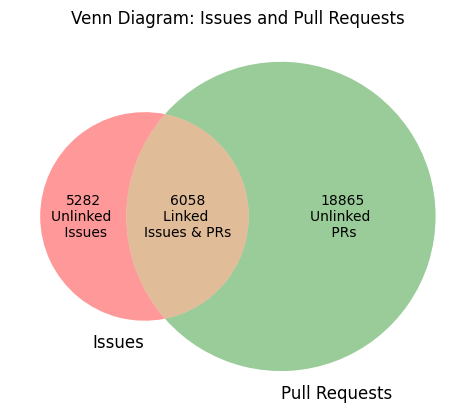

In [19]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define the data
total_issues = 18252
open_issues = 1481
closed_issues = 16771
total_prs = 24923
open_prs = 16  
closed_prs = 24907

linked_issues_open = 119  # Includes linked_prs_open = 11
linked_issues_closed = 12851  # Includes linked_prs_closed = 257
linked_prs_open = 11
linked_prs_closed = 6047

# Calculate the overlaps
linked_total = linked_issues_open + linked_issues_closed  # Total linked issues (open + closed)
linked_prs_total = linked_prs_open + linked_prs_closed  # Total linked PRs (open + closed)
intersection = linked_prs_total  # Linked PRs are within the linked issues

# Create the Venn diagram
venn = venn2(subsets=(
    total_issues - linked_total,  # Only issues not linked to PRs
    total_prs - linked_prs_total,  # Only PRs not linked to issues
    intersection),  # Issues and PRs that are linked
    set_labels=('Issues', 'Pull Requests'))

# Customize labels
venn.get_label_by_id('10').set_text(f'{total_issues - linked_total}\nUnlinked \n Issues')
venn.get_label_by_id('01').set_text(f'{total_prs - linked_prs_total}\nUnlinked \n PRs')
venn.get_label_by_id('11').set_text(f'{intersection}\nLinked \nIssues & PRs')

# Add title
plt.title("Venn Diagram: Issues and Pull Requests")

# Show the diagram
plt.show()

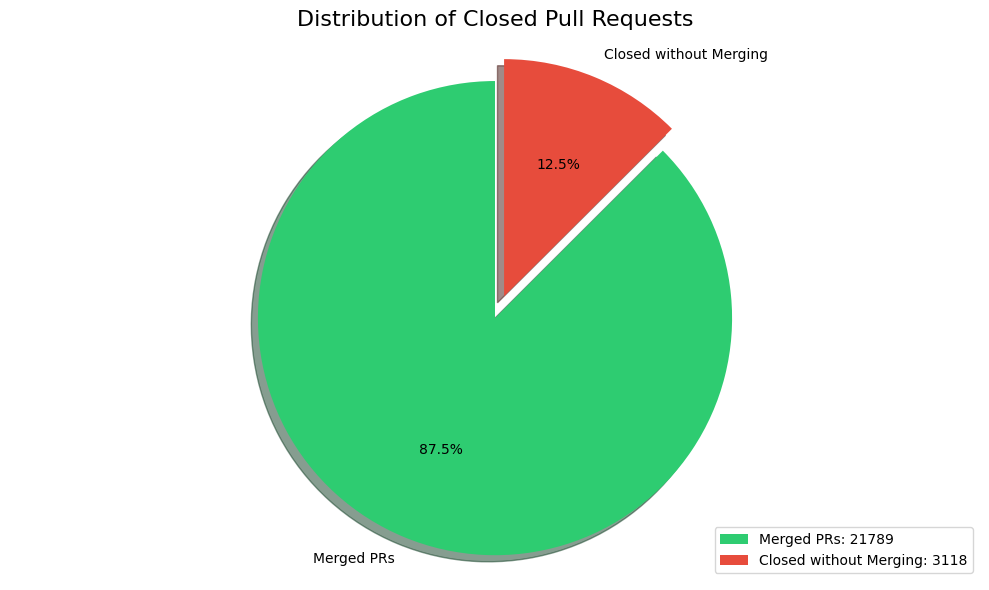

In [26]:
import matplotlib.pyplot as plt
merged_prs = 21789


# Data for the pie chart
sizes = [merged_prs, closed_prs - merged_prs]
labels = ['Merged PRs', 'Closed without Merging']
colors = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)  # explode the first slice (Merged PRs)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
    autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Closed Pull Requests', fontsize=16)
plt.tight_layout()

# Add legend with actual values
plt.legend([f'{labels[0]}: {sizes[0]}', f'{labels[1]}: {sizes[1]}'], loc='lower right')

plt.show()


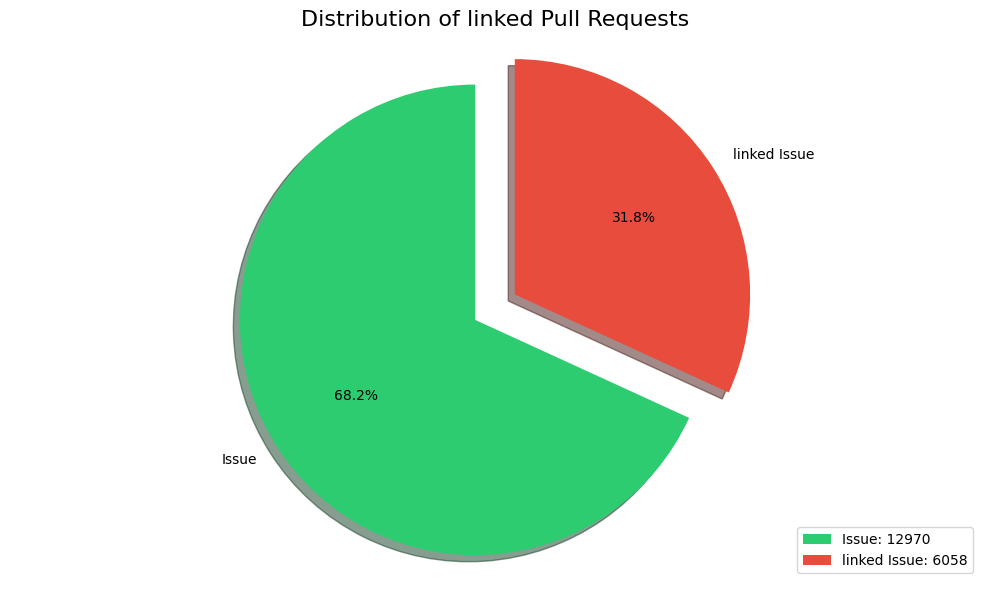

In [29]:
import matplotlib.pyplot as plt


# Data for the pie chart
sizes = [linked_total, intersection]
labels = ['Issue', 'linked Issue']
colors = ['#2ecc71', '#e74c3c']
explode = (0.2, 0)  # explode the first slice (Merged PRs)

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
    autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of linked Pull Requests', fontsize=16)
plt.tight_layout()

# Add legend with actual values
plt.legend([f'{labels[0]}: {sizes[0]}', f'{labels[1]}: {sizes[1]}'], loc='lower right')

plt.show()
